## Groupby

In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
Vegas = pd.read_csv('vegas.csv')
Vegas.shape

(504, 20)

In [8]:
Vegas.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [12]:
Vegas.columns = Vegas.columns.str.replace('.', '').str.replace(' ', '_').str.lower()
Vegas.head()

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [14]:
score_by_hotel = Vegas.score.groupby(Vegas.hotel_name)
score_by_hotel

In [15]:
score_by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')

0     5
1     3
2     5
3     4
4     4
5     3
6     4
7     4
8     4
9     3
10    2
11    3
12    2
13    3
14    3
15    4
16    1
17    4
18    3
19    2
20    4
21    1
22    4
23    2
Name: score, dtype: int64

In [16]:
score_by_hotel.mean().sort_values()

hotel_name
Circus Circus Hotel & Casino Las Vegas                3.21
Monte Carlo Resort&Casino                             3.29
Excalibur Hotel & Casino                              3.71
The Westin las Vegas Hotel Casino & Spa               3.92
Hilton Grand Vacations at the Flamingo                3.96
Treasure Island- TI Hotel & Casino                    3.96
Tropicana Las Vegas - A Double Tree by Hilton Hotel   4.04
Paris Las Vegas                                       4.04
The Cromwell                                          4.08
Caesars Palace                                        4.12
Hilton Grand Vacations on the Boulevard               4.17
Bellagio Las Vegas                                    4.21
Tuscany Las Vegas Suites & Casino                     4.21
The Cosmopolitan Las Vegas                            4.25
The Palazzo Resort Hotel Casino                       4.38
Wyndham Grand Desert                                  4.38
Trump International Hotel Las Vegas          

In [17]:
score_by_hotel.min()

hotel_name
Bellagio Las Vegas                                     2
Caesars Palace                                         1
Circus Circus Hotel & Casino Las Vegas                 1
Encore at wynn Las Vegas                               1
Excalibur Hotel & Casino                               2
Hilton Grand Vacations at the Flamingo                 2
Hilton Grand Vacations on the Boulevard                1
Marriott's Grand Chateau                               3
Monte Carlo Resort&Casino                              1
Paris Las Vegas                                        2
The Cosmopolitan Las Vegas                             1
The Cromwell                                           1
The Palazzo Resort Hotel Casino                        3
The Venetian Las Vegas Hotel                           3
The Westin las Vegas Hotel Casino & Spa                2
Treasure Island- TI Hotel & Casino                     3
Tropicana Las Vegas - A Double Tree by Hilton Hotel    1
Trump International 

In [18]:
score_by_hotel.size()

hotel_name
Bellagio Las Vegas                                     24
Caesars Palace                                         24
Circus Circus Hotel & Casino Las Vegas                 24
Encore at wynn Las Vegas                               24
Excalibur Hotel & Casino                               24
Hilton Grand Vacations at the Flamingo                 24
Hilton Grand Vacations on the Boulevard                24
Marriott's Grand Chateau                               24
Monte Carlo Resort&Casino                              24
Paris Las Vegas                                        24
The Cosmopolitan Las Vegas                             24
The Cromwell                                           24
The Palazzo Resort Hotel Casino                        24
The Venetian Las Vegas Hotel                           24
The Westin las Vegas Hotel Casino & Spa                24
Treasure Island- TI Hotel & Casino                     24
Tropicana Las Vegas - A Double Tree by Hilton Hotel    24
Tru

In [19]:
by_trav_pool = Vegas.score.groupby([Vegas.traveler_type, Vegas.pool])

<Axes: xlabel='traveler_type'>

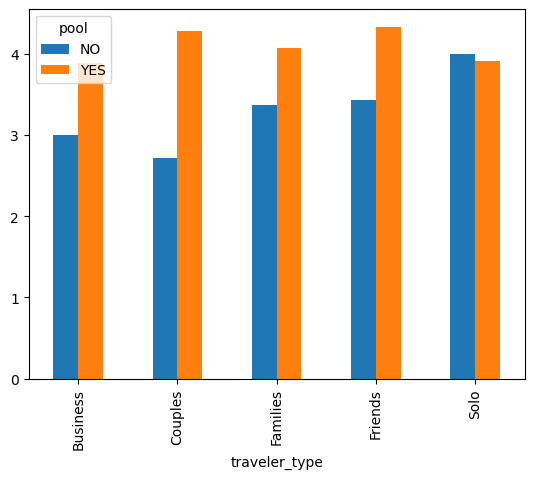

In [22]:
by_trav_pool.mean().unstack().plot(kind='bar')

In [23]:
grades = pd.Series([90,85,70,60])
studied = pd.Series([True, True, False, False])

In [25]:
grades.groupby(studied).mean()

False   65.00
True    87.50
dtype: float64

## Data Aggregation

In [26]:
Vegas.head()

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [27]:
by_hotel = Vegas.groupby('hotel_name')

In [28]:
by_hotel['score'].quantile(.5)

hotel_name
Bellagio Las Vegas                                    4.50
Caesars Palace                                        4.50
Circus Circus Hotel & Casino Las Vegas                3.00
Encore at wynn Las Vegas                              5.00
Excalibur Hotel & Casino                              4.00
Hilton Grand Vacations at the Flamingo                4.00
Hilton Grand Vacations on the Boulevard               4.50
Marriott's Grand Chateau                              5.00
Monte Carlo Resort&Casino                             3.50
Paris Las Vegas                                       4.00
The Cosmopolitan Las Vegas                            5.00
The Cromwell                                          4.50
The Palazzo Resort Hotel Casino                       5.00
The Venetian Las Vegas Hotel                          5.00
The Westin las Vegas Hotel Casino & Spa               4.00
Treasure Island- TI Hotel & Casino                    4.00
Tropicana Las Vegas - A Double Tree by Hilton

In [29]:
def my_range(var):
    return np.max(var) - np.min(var)

In [30]:
by_hotel['score'].agg(my_range)

hotel_name
Bellagio Las Vegas                                     3
Caesars Palace                                         4
Circus Circus Hotel & Casino Las Vegas                 4
Encore at wynn Las Vegas                               4
Excalibur Hotel & Casino                               3
Hilton Grand Vacations at the Flamingo                 3
Hilton Grand Vacations on the Boulevard                4
Marriott's Grand Chateau                               2
Monte Carlo Resort&Casino                              4
Paris Las Vegas                                        3
The Cosmopolitan Las Vegas                             4
The Cromwell                                           4
The Palazzo Resort Hotel Casino                        2
The Venetian Las Vegas Hotel                           2
The Westin las Vegas Hotel Casino & Spa                3
Treasure Island- TI Hotel & Casino                     2
Tropicana Las Vegas - A Double Tree by Hilton Hotel    4
Trump International 

In [31]:
Vegas.score.groupby(Vegas.pool).describe()

,count,mean,std,min,25%,50%,75%,max
pool,,,,,,,,
NO,24.00,3.21,1.10,1.00,2.75,3.00,4.00,5.00
YES,480.00,4.17,0.98,1.00,4.00,4.00,5.00,5.00


In [32]:
Vegas.score.groupby(Vegas.pool).value_counts().unstack()

score,1,2,3,4,5
pool,,,,,
NO,2,4,7,9,2
YES,9,26,65,155,225


In [35]:
by_hotel['score'].agg(['mean', ('range', my_range), ('4+ score', lambda x : x.mean() > 4)])

,mean,range,4+ score
hotel_name,,,
Bellagio Las Vegas,4.21,3,True
Caesars Palace,4.12,4,True
Circus Circus Hotel & Casino Las Vegas,3.21,4,False
Encore at wynn Las Vegas,4.54,4,True
Excalibur Hotel & Casino,3.71,3,False
Hilton Grand Vacations at the Flamingo,3.96,3,False
Hilton Grand Vacations on the Boulevard,4.17,4,True
Marriott's Grand Chateau,4.54,2,True
Monte Carlo Resort&Casino,3.29,4,False


In [36]:
by_hotel[['score','member_years']].agg(['mean', my_range])

score           \
                                                    mean my_range   
hotel_name                                                          
Bellagio Las Vegas                                  4.21        3   
Caesars Palace                                      4.12        4   
Circus Circus Hotel & Casino Las Vegas              3.21        4   
Encore at wynn Las Vegas                            4.54        4   
Excalibur Hotel & Casino                            3.71        3   
Hilton Grand Vacations at the Flamingo              3.96        3   
Hilton Grand Vacations on the Boulevard             4.17        4   
Marriott's Grand Chateau                            4.54        2   
Monte Carlo Resort&Casino                           3.29        4   
Paris Las Vegas                                     4.04        3   
The Cosmopolitan Las Vegas                          4.25        4   
The Cromwell                                        4.08        4   
The Palazzo Resort Hotel Casino                     4.38        2   
The Venetian Las Vegas Hotel                        4.58        2   
The Westin las Vegas Hotel Casino & Spa             3.92        3   
Treasure Island- TI Hotel & Casino                  3.96        2   
Tropicana Las Vegas - A Double Tree by Hilton H...  4.04        4   
Trump International Hotel Las Vegas                 4.38        4   
Tuscany Las Vegas Suites & Casino                   4.21        3   
Wyndham Grand Desert                                4.38        2   
Wynn Las Vegas                                      4.62        3   

                                                   member_years           
                                                           mean my_range  
hotel_name                                                                
Bellagio Las Vegas                                         3.42       10  
Caesars Palace                                             4.75       13  
Circus Circus Hotel & Casino Las Vegas                     3.83       10  
Encore at wynn Las Vegas                                   4.75        9  
Excalibur Hotel & Casino                                   4.50       11  
Hilton Grand Vacations at the Flamingo                     3.96       10  
Hilton Grand Vacations on the Boulevard                    4.79       10  
Marriott's Grand Chateau                                   4.38       10  
Monte Carlo Resort&Casino                                  3.58        9  
Paris Las Vegas                                            3.62        9  
The Cosmopolitan Las Vegas                                 4.50       10  
The Cromwell                                               3.58       11  
The Palazzo Resort Hotel Casino                            5.29       10  
The Venetian Las Vegas Hotel                               4.38       10  
The Westin las Vegas Hotel Casino & Spa                    5.75       11  
Treasure Island- TI Hotel & Casino                       -71.04     1818  
Tropicana Las Vegas - A Double Tree by Hilton H...         3.08       10  
Trump International Hotel Las Vegas                        4.33       11  
Tuscany Las Vegas Suites & Casino                          4.71        8  
Wyndham Grand Desert                                       4.54       10  
Wynn Las Vegas                                             5.42       10

In [37]:
func_dict = {'score': 'mean', 'user_country': lambda x: (x != 'USA').mean()}

In [38]:
hotel_df = by_hotel.agg(func_dict)

In [39]:
hotel_df

,score,user_country
hotel_name,,
Bellagio Las Vegas,4.21,0.67
Caesars Palace,4.12,0.42
Circus Circus Hotel & Casino Las Vegas,3.21,0.58
Encore at wynn Las Vegas,4.54,0.42
Excalibur Hotel & Casino,3.71,0.75
Hilton Grand Vacations at the Flamingo,3.96,0.50
Hilton Grand Vacations on the Boulevard,4.17,0.58
Marriott's Grand Chateau,4.54,0.67
Monte Carlo Resort&Casino,3.29,0.75


In [41]:
by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')['pool']

0     NO
1     NO
2     NO
3     NO
4     NO
5     NO
6     NO
7     NO
8     NO
9     NO
10    NO
11    NO
12    NO
13    NO
14    NO
15    NO
16    NO
17    NO
18    NO
19    NO
20    NO
21    NO
22    NO
23    NO
Name: pool, dtype: object

In [42]:
by_hotel['pool'].first()

hotel_name
Bellagio Las Vegas                                     YES
Caesars Palace                                         YES
Circus Circus Hotel & Casino Las Vegas                  NO
Encore at wynn Las Vegas                               YES
Excalibur Hotel & Casino                               YES
Hilton Grand Vacations at the Flamingo                 YES
Hilton Grand Vacations on the Boulevard                YES
Marriott's Grand Chateau                               YES
Monte Carlo Resort&Casino                              YES
Paris Las Vegas                                        YES
The Cosmopolitan Las Vegas                             YES
The Cromwell                                           YES
The Palazzo Resort Hotel Casino                        YES
The Venetian Las Vegas Hotel                           YES
The Westin las Vegas Hotel Casino & Spa                YES
Treasure Island- TI Hotel & Casino                     YES
Tropicana Las Vegas - A Double Tree by Hilton

In [43]:
def is_unique(x):
    return len(x.unique()) == 1

In [45]:
by_hotel['pool'].agg(is_unique).all()

True

In [46]:
by_hotel.agg(is_unique).all()

user_country        False
nr_reviews          False
nr_hotel_reviews    False
helpful_votes       False
score               False
period_of_stay      False
traveler_type       False
pool                 True
gym                  True
tennis_court         True
spa                  True
casino               True
free_internet        True
hotel_stars          True
nr_rooms             True
user_continent      False
member_years        False
review_month        False
review_weekday      False
dtype: bool

In [47]:
func_dict = {'score': 'mean',
             'user_country': lambda x: (x != 'USA').mean(),
             'pool': 'first',
             'gym': 'first',
             'tennis_court': 'first',
             'spa': 'first',
             'casino': 'first',
             'free_internet': 'first',
             'hotel_stars': 'first',
             'nr_rooms': 'first'
             }

In [51]:
hotel_df = by_hotel.agg(func_dict)
hotel_df.columns = ['mean_score', 'percent_non_USA'] + list(hotel_df.columns[2:])
hotel_df

,mean_score,percent_non_USA,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms
hotel_name,,,,,,,,,,
Bellagio Las Vegas,4.21,0.67,YES,YES,NO,YES,YES,YES,5,3933
Caesars Palace,4.12,0.42,YES,YES,NO,YES,YES,YES,5,3348
Circus Circus Hotel & Casino Las Vegas,3.21,0.58,NO,YES,NO,NO,YES,YES,3,3773
Encore at wynn Las Vegas,4.54,0.42,YES,YES,NO,YES,YES,YES,5,2034
Excalibur Hotel & Casino,3.71,0.75,YES,YES,NO,YES,YES,YES,3,3981
Hilton Grand Vacations at the Flamingo,3.96,0.50,YES,YES,NO,NO,NO,YES,3,315
Hilton Grand Vacations on the Boulevard,4.17,0.58,YES,YES,NO,YES,YES,YES,"3,5",1228
Marriott's Grand Chateau,4.54,0.67,YES,YES,NO,NO,YES,YES,"3,5",732
Monte Carlo Resort&Casino,3.29,0.75,YES,YES,NO,YES,YES,NO,4,3003


In [52]:
hotel_df.to_csv('hotels.csv')